# Sales prediction using python. 

In [30]:
# First import all the libraries that we are going to use

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [51]:
df = pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [52]:
df.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [32]:
# drop columns that are not necessary as by removing them dataset become more scalable

df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [34]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [35]:
# Assign the columns as a values to variables and then apply the model as X_train, X_test, y_train, y_test

X = df[['TV','Radio','Newspaper']]
y = df[['Sales']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=40)

In [36]:
X_train

,TV,Radio,Newspaper
86,76.3,27.5,16.0
182,56.2,5.7,29.7
69,216.8,43.9,27.2
125,87.2,11.8,25.9
42,293.6,27.7,1.8
...,...,...,...
50,199.8,3.1,34.6
184,253.8,21.3,30.0
165,234.5,3.4,84.8
7,120.2,19.6,11.6


In [37]:
X_test

,TV,Radio,Newspaper
96,197.6,3.5,5.9
5,8.7,48.9,75.0
116,139.2,14.3,25.6
35,290.7,4.1,8.5
183,287.6,43.0,71.8
160,172.5,18.1,30.7
54,262.7,28.8,15.9
134,36.9,38.6,65.6
90,134.3,4.9,9.3
191,75.5,10.8,6.0


In [38]:
y_train

,Sales
86,12.0
182,8.7
69,22.3
125,10.6
42,20.7
...,...
50,11.4
184,17.6
165,11.9
7,13.2


In [39]:
y_test

,Sales
96,11.7
5,7.2
116,12.2
35,12.8
183,26.2
160,14.4
54,20.2
134,10.8
90,11.2
191,9.9


In [40]:
# applying linear regression model and passing X_train, y_train to it

model = LinearRegression().fit(X_train, y_train)
model

LinearRegression()

In [41]:
# predicted values of X_train will be stored in y_pred

y_pred_training = model.predict(X_train)
print("Predicted values after model: ", y_pred_training)

Predicted values after model:  [[11.92545497]
 [ 6.73930084]
 [21.27018494]
 [ 9.30720421]
 [21.57794244]
 [14.07221305]
 [16.71858833]
 [15.60673344]
 [18.25436251]
 [12.75166831]
 [24.84002843]
 [ 8.39390379]
 [ 8.85311212]
 [17.27774267]
 [ 8.3310295 ]
 [16.41077138]
 [13.98674143]
 [20.78004919]
 [ 9.77149529]
 [11.96132123]
 [18.54410367]
 [ 7.65707634]
 [ 7.21353386]
 [ 8.10557739]
 [19.72765637]
 [11.01431087]
 [10.13194014]
 [13.30595943]
 [10.24150888]
 [20.518777  ]
 [20.10385435]
 [16.16573395]
 [15.38318316]
 [14.99160339]
 [ 9.00624614]
 [23.17459006]
 [ 8.9170563 ]
 [14.82084662]
 [20.53661005]
 [20.73425838]
 [12.48426916]
 [12.72866411]
 [15.4159785 ]
 [ 9.43597366]
 [12.10601423]
 [13.11827821]
 [ 9.78452366]
 [20.98013461]
 [17.77965284]
 [13.71089317]
 [20.01184908]
 [16.46445858]
 [11.26495506]
 [ 8.07148079]
 [22.08168902]
 [14.544331  ]
 [10.019166  ]
 [19.40174339]
 [ 6.75490747]
 [11.8631176 ]
 [12.98510743]
 [16.45093393]
 [15.71337053]
 [15.44300305]
 [19.0333

In [42]:
# predicted values of X_test will be stored in y_pred_test

y_pred_test = model.predict(X_test)
print('Predicted values after model :', y_pred_test)

Predicted values after model : [[12.61642732]
 [12.92004597]
 [12.08471384]
 [16.82199977]
 [24.05507461]
 [14.27401262]
 [20.38340381]
 [12.18421129]
 [10.09174637]
 [ 8.66655408]
 [19.95514125]
 [19.30787454]
 [12.14730531]
 [15.21977508]
 [17.23740592]
 [ 9.7598278 ]
 [14.41000251]
 [16.51146169]
 [ 8.92695588]
 [16.02464885]
 [10.05186805]
 [19.4154987 ]
 [15.12151244]
 [21.16976203]
 [13.66330888]
 [12.21606824]
 [10.2390723 ]
 [18.17447189]
 [ 8.14300866]
 [10.98457653]
 [18.84836683]
 [ 9.0123122 ]
 [17.14149406]
 [17.81595324]
 [17.37571806]
 [11.30634219]
 [14.48268811]
 [21.22881792]
 [12.1818627 ]
 [23.36759687]]


In [43]:
from sklearn.metrics import r2_score

In [44]:
# obtain r2_score by importing it and passing values of y_test, y_pred_test to it (i.e test)

r2_score(y_test,y_pred_test)

0.7982652261831078

In [45]:
# gain r2_score by passing values of y_train, y_pred_training (i.e train)

r2_score(y_train,y_pred_training)

0.9200686687210912

Text(0.5, 1.0, 'Actual vs Predicted [Training Data]')

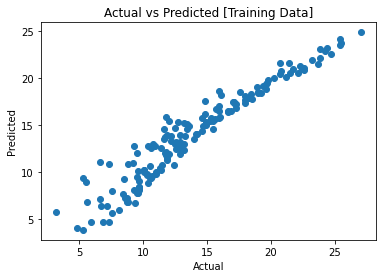

In [46]:
# graphical representation of train set (y_train, y_pred_training)

plt.scatter(y_train, y_pred_training)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted [Training Data]")

Text(0.5, 1.0, 'Test set Actual VS Predicted')

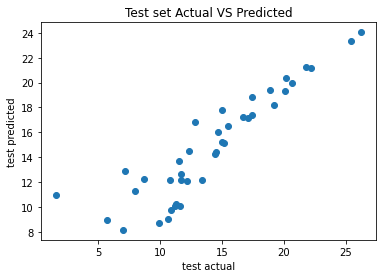

In [47]:
# graphical representation of test set (y_test, y_pred_test)

plt.scatter(y_test , y_pred_test)
plt.xlabel("test actual")
plt.ylabel('test predicted')
plt.title('Test set Actual VS Predicted')

In [48]:
Actual = pd.DataFrame(y_test)
Actual

,Sales
96,11.7
5,7.2
116,12.2
35,12.8
183,26.2
160,14.4
54,20.2
134,10.8
90,11.2
191,9.9


In [49]:
Predicted = pd.DataFrame(y_pred_test)
Predicted

,0
0,12.616427
1,12.920046
2,12.084714
3,16.822000
4,24.055075
5,14.274013
6,20.383404
7,12.184211
8,10.091746
9,8.666554


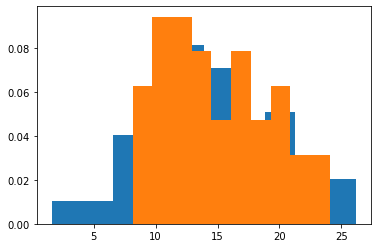

In [50]:
# graphical comparsion of y_test and y_pred_test

plt.hist(y_test, density=True)
plt.hist(y_pred_test, density=True)
plt.show()